In [ ]:

import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
# import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import sequence
tfds.disable_progress_bar()

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2023-07-13 02:10:54--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.04s   

2023-07-13 02:10:54 (8.68 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2023-07-13 02:10:54--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==============

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
traindata=pd.read_csv(train_file_path, sep="\t", header=None, names=["type", "msg"])
testdata= pd.read_csv(test_file_path, sep="\t", header=None, names=["type", "msg"])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
traindata.head()

,type,msg
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [ ]:
testdata.head()

,type,msg
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?


In [ ]:
def pr(x):
   x=x.lower()
   tokens=nltk.word_tokenize(x)
   stop_words=set(stopwords.words('english'))
   punctuations = string.punctuation
   tagged_tokens = nltk.pos_tag(tokens)
   lemmatizer = WordNetLemmatizer()
   lemmas = []
   for token, tag in tagged_tokens:
     if token not in stop_words and token not in punctuations:
        pos = tag[0].lower() if tag[0].lower() in ['a', 'r', 'n', 'v'] else wordnet.NOUN
        lemma = lemmatizer.lemmatize(token, pos=pos)
        lemmas.append(lemma)

   filtered_sentence = ' '.join(lemmas)
   return filtered_sentence

In [ ]:
traindata['msg'] = traindata['msg'].apply(pr)
traindata.head()

,type,msg
0,ham,ahhhh ... wake bad dream u tho dont like u rig...
1,ham,never nothing
2,ham,u sound like manky scouse boy steve like trave...
3,ham,mum say wan go go ... shun bian watch da glass...
4,ham,never lei ... v lazy ... get wat dat day ü sen...


In [ ]:
testdata['msg'] = testdata['msg'].apply(pr)
testdata.head()

,type,msg
0,ham,hospital da return home even
1,ham,much textin bout
2,ham,probably wo n't eat today think 'm gon na pop ...
3,ham,‘ give fly monkey wot think certainly ‘ mind f...
4,ham,see


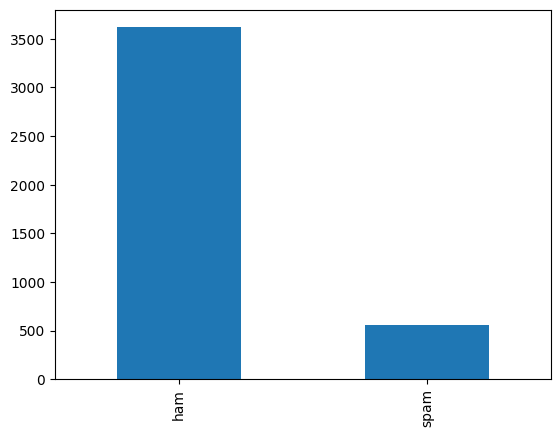

In [ ]:
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
traindata['type'].value_counts().plot(kind='bar')
rus = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = rus.fit_resample(traindata[['msg']], traindata[['type']])

<Axes: xlabel='type'>

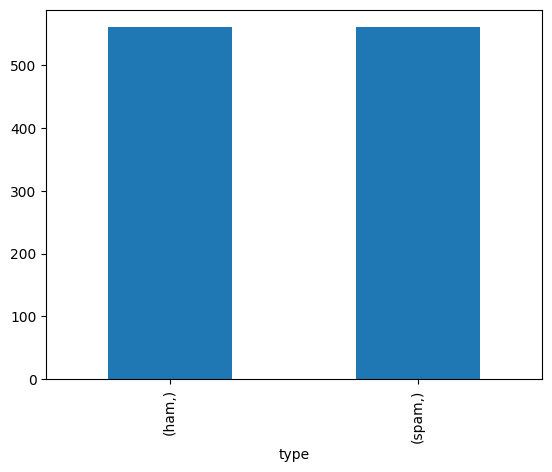

In [ ]:
y_resampled.value_counts().plot(kind='bar')


In [ ]:
x_train=X_resampled['msg']
y_train=y_resampled['type']
print(x_train.shape)
print(y_train.shape)

(1120,)
(1120,)


In [ ]:
x_train

0                                      lmao take pic send
1                                   old orchard near univ
2                         wot student discount u get book
3                           thanks look really appreciate
4                          yes finish watch day life love
                              ...                        
1115    free msg single find partner area 1000 real pe...
1116    free2day sexy st george 's day pic jordan txt ...
1117    winner specially select receive £1000 cash £20...
1118    free entry £250 weekly competition text word w...
1119    -pls stop bootydelious 32/f invite friend repl...
Name: msg, Length: 1120, dtype: object

In [ ]:
y_train.value_counts()

ham     560
spam    560
Name: type, dtype: int64

In [ ]:
label_mapper = lambda x: 1 if x == 'spam' else 0
y_train = y_train.map(label_mapper)


In [ ]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1115    1
1116    1
1117    1
1118    1
1119    1
Name: type, Length: 1120, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)
X_tfidf=vectorizer.transform(x_train)
x=X_tfidf

In [ ]:
x.shape
x_train=x

In [ ]:
df_train_tfidf = pd.DataFrame.sparse.from_spmatrix(x_train, columns=vectorizer.vocabulary_.keys())
df_train_tfidf

,lmao,take,pic,send,old,orchard,near,univ,wot,student,...,stopcs,08717890890,free2day,st,george,89080,0870241182716,087147123779am,bootydelious,32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
label_mapper = lambda x: 1 if x == 'spam' else 0
testdata['type'] = testdata['type'].map(label_mapper)

x_test=testdata[['msg']]
y_test=testdata['type']

y_test

0       0
1       0
2       0
3       0
4       0
       ..
1387    0
1388    0
1389    0
1390    1
1391    1
Name: type, Length: 1392, dtype: int64

In [ ]:
X_tfidf_test = vectorizer.transform(testdata['msg'])
x_test=X_tfidf_test

In [ ]:
df_test_tfidf = pd.DataFrame.sparse.from_spmatrix(x_test, columns=vectorizer.vocabulary_.keys())
df_test_tfidf

,lmao,take,pic,send,old,orchard,near,univ,wot,student,...,stopcs,08717890890,free2day,st,george,89080,0870241182716,087147123779am,bootydelious,32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train_tfidf

,lmao,take,pic,send,old,orchard,near,univ,wot,student,...,stopcs,08717890890,free2day,st,george,89080,0870241182716,087147123779am,bootydelious,32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.value_counts()

0    560
1    560
Name: type, dtype: int64

In [ ]:

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (1120, 3506)
y_train (1120,)
x_test (1392, 3506)
y_test (1392,)


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_train)
y_testp = clf.predict(x_test)
acc_score = accuracy_score(y_train, y_pred)
acc_scoret = accuracy_score(y_test, y_testp)
print('Accuracy score train :', acc_score)
print('Accuracy score test :', acc_scoret)

Accuracy score train : 0.9991071428571429
Accuracy score test : 0.9734195402298851


In [ ]:
train=df_train_tfidf
test=df_test_tfidf

print(train.shape)
print(test.shape)

(1120, 3506)
(1392, 3506)


In [ ]:

inputs = tf.keras.Input(shape=(None,train.shape[1]))
x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 3506)]      0         
                                                                 
 dense (Dense)               (None, None, 256)         897792    
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 dense_1 (Dense)             (None, None, 128)         32896     
                                                                 
 dropout_1 (Dropout)         (None, None, 128)         0         
                                                                 
 dense_2 (Dense)             (None, None, 64)          8256      
                                                                 
 dense_3 (Dense)             (None, None, 64)          4160  

In [ ]:
train=np.array(train)
test=np.array(test)


In [ ]:

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=13)


h=model.fit(x=train,y=y_train,batch_size=32,validation_data=(test,y_test),epochs=100,callbacks=[early_stop],  validation_steps=30)

Epoch 1/100
35/35 [==============================] - 8s 15ms/step - loss: 4.5020 - accuracy: 0.5411 - val_loss: 2.3020 - val_accuracy: 0.4865
Epoch 2/100
35/35 [==============================] - 0s 9ms/step - loss: 1.7709 - accuracy: 0.8652 - val_loss: 1.3824 - val_accuracy: 0.9375
Epoch 3/100
35/35 [==============================] - 0s 9ms/step - loss: 1.1589 - accuracy: 0.9152 - val_loss: 0.9574 - val_accuracy: 0.9521
Epoch 4/100
35/35 [==============================] - 0s 7ms/step - loss: 0.7341 - accuracy: 0.9491 - val_loss: 0.5427 - val_accuracy: 0.9729
Epoch 5/100
35/35 [==============================] - 0s 7ms/step - loss: 0.5032 - accuracy: 0.9670 - val_loss: 0.4868 - val_accuracy: 0.9677
Epoch 6/100
35/35 [==============================] - 0s 8ms/step - loss: 0.4114 - accuracy: 0.9786 - val_loss: 0.4348 - val_accuracy: 0.9688
Epoch 7/100
35/35 [==============================] - 0s 9ms/step - loss: 0.3662 - accuracy: 0.9884 - val_loss: 0.4057 - val_accuracy: 0.9656
Epoch 8/100


In [ ]:
def plot_graphs(h, metric):
    plt.plot(h.history[metric])
    plt.plot(h.history['val_'+metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

(0.0, 4.718320824205875)

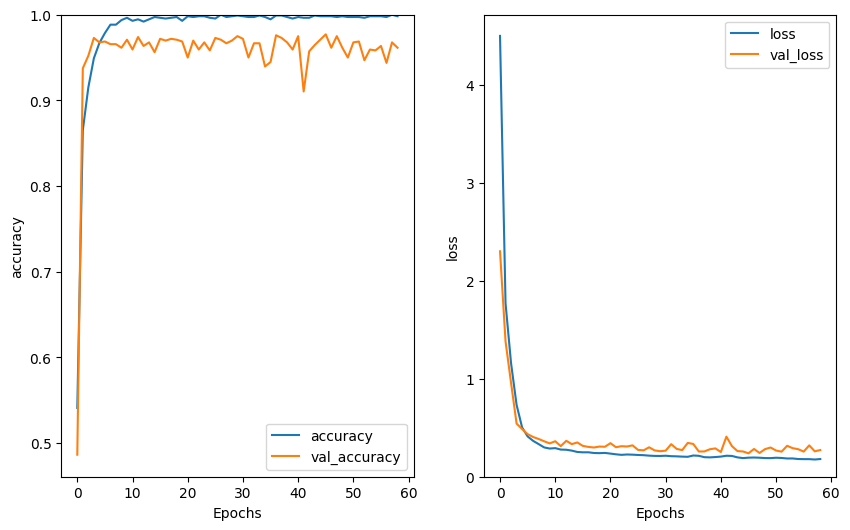

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_graphs(h, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(h, 'loss')
plt.ylim(0, None)

In [ ]:
traindata["type"] = pd.factorize(traindata["type"])[0]
testdata["type"] = pd.factorize(testdata["type"])[0]

In [ ]:
train_labels =  traindata["type"].values
train_ds = tf.data.Dataset.from_tensor_slices(
    (traindata["msg"].values, train_labels)
)

In [ ]:
test_labels =  testdata["type"].values
test_ds = tf.data.Dataset.from_tensor_slices(
    (testdata["msg"].values, test_labels)
)
test_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

This step is important. It's not only about batching the data sets, but also reshape it to make it works when fitting the model. Otherwise, we will get incompatible layers errors: expecting ndim=3, got ndim=2.a

In [ ]:
BUFFER_SIZE = 100
BATCH_SIZE = 32
train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
vec = TextVectorization(
    output_mode='int',
    max_tokens=1000,
    output_sequence_length=1000,
)

vec.adapt(train_ds.map(lambda text, label: text))

In [ ]:
vocab = np.array(vec.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'u', 'get', 'call', 'go', 's', '2', 'm', 'ur', 'nt',
       'come', 'gt', 'lt', '4', 'ok', 'know', 'free', 'like', 'send'],
      dtype='<U14')

In [ ]:
model2 = tf.keras.Sequential([
    vec,
    tf.keras.layers.Embedding(
        len(vec.get_vocabulary()),
        64,
        mask_zero=True,
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])


model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy'],
)

In [ ]:
history = model2.fit(
    train_ds,
    validation_data=test_ds,
    validation_steps=30,
    epochs=10,
)

Epoch 1/10
131/131 [==============================] - 104s 636ms/step - loss: 0.6310 - accuracy: 0.8660 - val_loss: 0.5360 - val_accuracy: 0.8604
Epoch 2/10
131/131 [==============================] - 56s 430ms/step - loss: 0.4245 - accuracy: 0.8660 - val_loss: 0.2682 - val_accuracy: 0.8604
Epoch 3/10
131/131 [==============================] - 54s 417ms/step - loss: 0.1882 - accuracy: 0.9198 - val_loss: 0.1296 - val_accuracy: 0.9708
Epoch 4/10
131/131 [==============================] - 53s 404ms/step - loss: 0.1000 - accuracy: 0.9785 - val_loss: 0.0864 - val_accuracy: 0.9792
Epoch 5/10
131/131 [==============================] - 55s 422ms/step - loss: 0.0683 - accuracy: 0.9856 - val_loss: 0.0722 - val_accuracy: 0.9781
Epoch 6/10
131/131 [==============================] - 52s 403ms/step - loss: 0.0544 - accuracy: 0.9895 - val_loss: 0.0686 - val_accuracy: 0.9792
Epoch 7/10
131/131 [==============================] - 52s 397ms/step - loss: 0.0440 - accuracy: 0.9923 - val_loss: 0.0676 - val_a

(0.0, 0.6614282565191388)

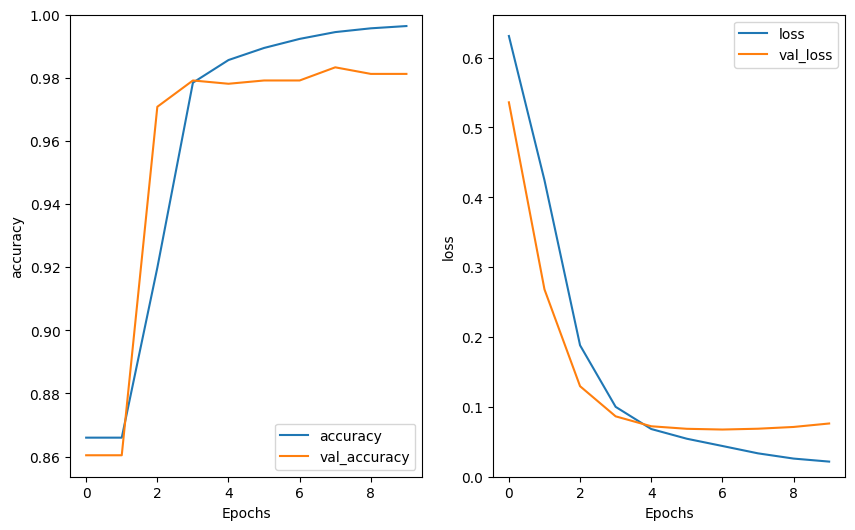

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])

def predict_message(pred_text):
  pred_matrix_sparse = vectorizer.transform([pred_text])
  pred_matrix_dense = pred_matrix_sparse.toarray()
  yprediction = model.predict(pred_matrix_dense)


  if yprediction[0]<0.5:
    return [yprediction[0],'ham']
  else:
      return [y_pred[0],'spam']


pred_text = "sale today! to stop texts call 9891246032"

prediction = predict_message(pred_text)
print(prediction)

1/1 [==============================] - 0s 74ms/step
[0, 'spam']


In [ ]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 [==============================] - 0s 23ms/step
You passed the challenge. Great job!
